# Sentiment Analysis of Amazon Alexa Reviews 

## References


https://www.kaggle.com/code/shivangamsoni/sentiment-analysis-logistic-regression

https://www.kaggle.com/code/subhadipde2000/sentiment-analysis-of-amazon-reviews

Dataset: https://www.kaggle.com/datasets/kritanjalijain/amazon-reviews

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Understanding Datasets

In [2]:
df_train = pd.read_csv("amazon_reviews_data/train.csv", header=None)
df_train.head()

,0,1,2
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [3]:
df_test = pd.read_csv("amazon_reviews_data/test.csv", header=None)
df_test.head()

,0,1,2
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [4]:
# adding header to train dataset
df_train.columns = ['sentiment', 'title', 'text']
df_train.head()

,sentiment,title,text
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [5]:
# adding header to test dataset
df_test.columns = ['sentiment', 'title', 'text']
df_test.head()

,sentiment,title,text
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   sentiment  int64 
 1   title      object
 2   text       object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  400000 non-null  int64 
 1   title      399976 non-null  object
 2   text       400000 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.2+ MB


In [8]:
df_train.shape

(3600000, 3)

In [9]:
df_test.shape

(400000, 3)

Clearly, train dataset contains 3600000 datapoints(reviews) and test dataset contains 400000 datapoints(reviews) with 3 columns each

In [10]:
# Checking for null values in the dataset
df_train.isna().sum()

sentiment      0
title        207
text           0
dtype: int64

In [11]:
# Removing the null value datapoints
df_train.dropna(inplace=True)
df_train.isna().sum()

sentiment    0
title        0
text         0
dtype: int64

In [12]:
df_train.shape

(3599793, 3)

In [13]:
# Checking for null values in the dataset
df_test.isna().sum()

sentiment     0
title        24
text          0
dtype: int64

In [14]:
# Removing the null value datapoints
df_test.dropna(inplace=True)
df_test.isna().sum()

sentiment    0
title        0
text         0
dtype: int64

In [15]:
df_test.shape

(399976, 3)

In [16]:
# Checking duplicates in the data
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


All null values are removed, no duplicates found

In [17]:
def review_lengths(dataframe, col):
    max_len = 0
    min_len = 99999999999999
    total_len = 0

    for text in dataframe[col].tolist():
        if text != None:
            total_len += len(text.split())
            if len(text.split()) > max_len:
                max_len = len(text.split())
            if len(text.split()) < min_len:
                min_len = len(text.split())

    avg_len = round(total_len/len(dataframe))

    print(f"The longest {col} has {max_len} words, the shortest {col} has {min_len} words, and the average {col} length is {avg_len} words.")

In [18]:
review_lengths(df_train,'text')

The longest text has 254 words, the shortest text has 1 words, and the average text length is 74 words.


In [19]:
review_lengths(df_test, 'text')

The longest text has 217 words, the shortest text has 2 words, and the average text length is 74 words.


In [20]:
review_lengths(df_train, 'title')

The longest title has 39 words, the shortest title has 1 words, and the average title length is 4 words.


In [21]:
review_lengths(df_test, 'title')

The longest title has 29 words, the shortest title has 1 words, and the average title length is 4 words.


## Data Visualization

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram(df, col, nbins=50, category=False, xlabel=None):
    plt.figure(figsize=(9, 3))
    
    df['length'] = df[col].map(len)
    
    if category:
        sns.histplot(data=df, x='length', bins=nbins, kde=False, hue='sentiment',palette='viridis', multiple='stack')
    else:
        sns.histplot(data=df, x='length', bins=nbins, kde=False, color='green')

    plt.xlabel(xlabel if xlabel else col)
    plt.ylabel('Count')
    plt.title(f'Lengths of {col} coulmn')
    plt.show()

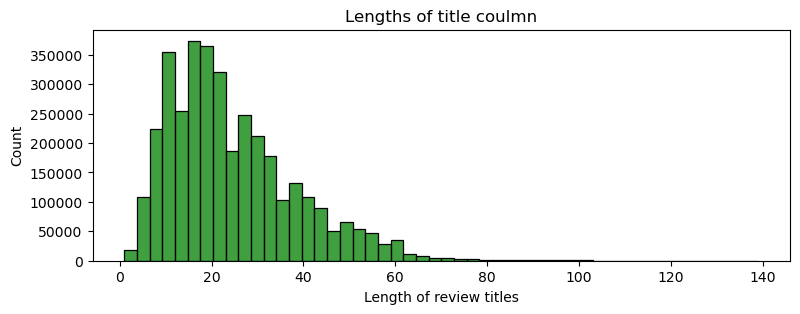

In [23]:
plot_histogram(df_train, 'title', xlabel='Length of review titles')

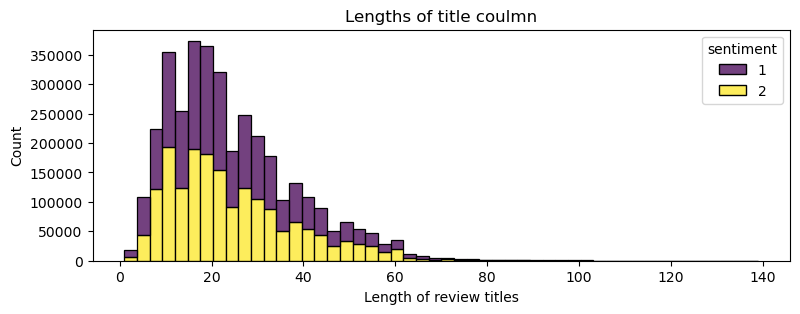

In [24]:
plot_histogram(df_train, 'title', category=True, xlabel='Length of review titles')

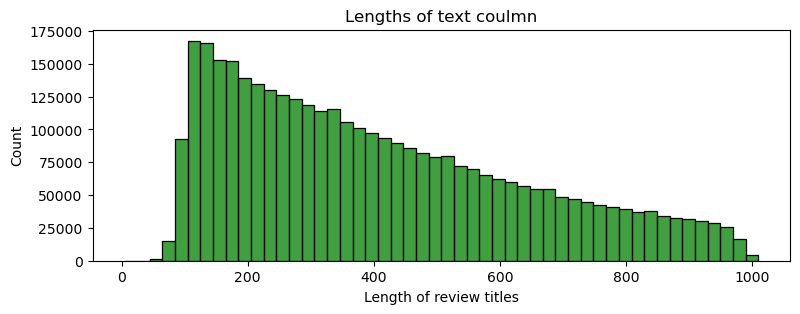

In [25]:
plot_histogram(df_train, 'text', xlabel='Length of review titles')

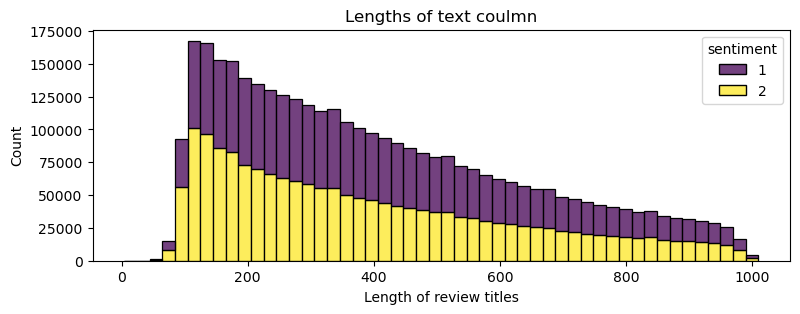

In [26]:
plot_histogram(df_train, 'text', category=True, xlabel='Length of review titles')

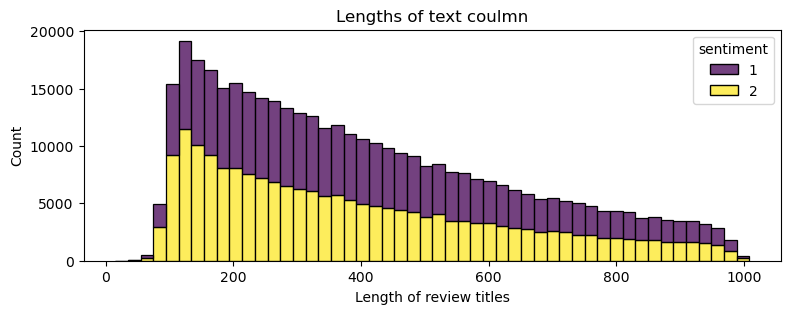

In [27]:
plot_histogram(df_test, 'text', category=True, xlabel='Length of review titles')

In [28]:
df_train.sentiment.value_counts()

sentiment
2    1799913
1    1799880
Name: count, dtype: int64

In [29]:
df_test.sentiment.value_counts()

sentiment
2    199992
1    199984
Name: count, dtype: int64

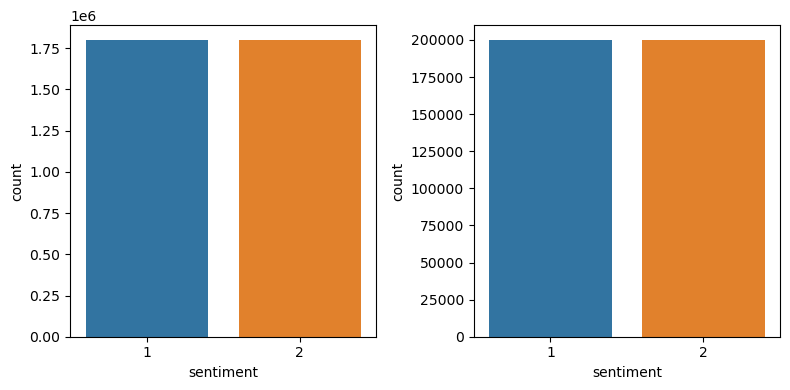

In [30]:
fig, axs = plt.subplots(1,2, figsize=(8, 4))
sns.countplot(x='sentiment', data=df_train, ax=axs[0])
sns.countplot(x='sentiment', data=df_test, ax=axs[1])
plt.tight_layout()
plt.show()

 Both training and testing has almost equal number of positive and negative sentiments. Data is Balanced.

## Data Preprocessing

In [31]:
import re

def preprocess_text(text):
    text = text.lower() # changing all characters into lower case
    text = re.sub(r'[@#$%^&*()\-<>+=?/`~!;:><]', ' ', text) # Replacing special characters with whitespace
    text = re.sub(r'\bhttp\S+|www\S+', '', text) # Removing sentences starting with "http" or "www"
    text = re.sub(r'[^\w\s]', ' ', text) # Replacing all punctuations with whitespace
    text = re.sub(r'\s+', ' ', text) # Converting consecutive whitespaces into a single whitespace
    
    return text

In [32]:
# combining both text and title columns with a dot and performing preprocessing
def transform_dataset(dataset):
    df = dataset.copy()
    if 'reviews' not in df.columns:
        df['reviews'] = df['title'] + ". " + df['text']
        df = df.drop(['text', 'title','length'], axis=1)
        df['reviews'] = df['reviews'].apply(preprocess_text)
    return df

In [33]:
df_train_transformed = transform_dataset(df_train)
df_train_transformed.head()

,sentiment,reviews
0,2,stuning even for the non gamer this sound trac...
1,2,the best soundtrack ever to anything i m readi...
2,2,amazing this soundtrack is my favorite music o...
3,2,excellent soundtrack i truly like this soundtr...
4,2,remember pull your jaw off the floor after hea...


Observing lengths of transformed dataset columuns

In [34]:
review_lengths(df_train_transformed, 'reviews')

The longest reviews has 257 words, the shortest reviews has 0 words, and the average reviews length is 81 words.


Checking empty reviews

In [35]:
df_train_transformed[df_train_transformed['reviews'].apply(lambda x: len(x.split()) == 0)]

,sentiment,reviews
294435,2,


In [36]:
# Dropping the above row
df_train_transformed = df_train_transformed.drop(index=294435)

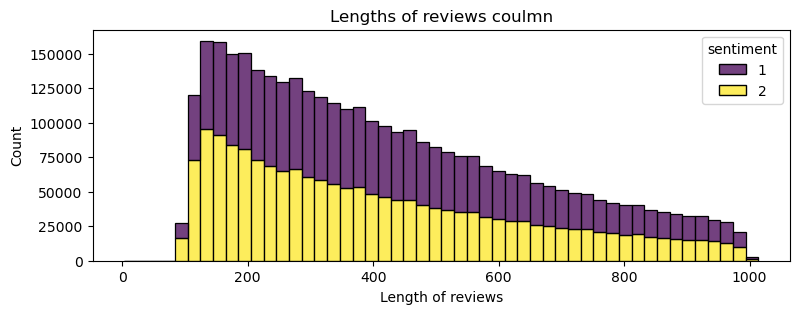

In [37]:
plot_histogram(df_train_transformed, 'reviews',category=True, xlabel='Length of reviews')

In [38]:
# Checking for duplicates in the transformed dataset
df_train_transformed.duplicated().sum()

972

In [39]:
# Dropping the duplicates from the transformed dataset
df_train_transformed.drop_duplicates(inplace=True)

In [40]:
df_test_transformed = transform_dataset(df_test)
df_test_transformed.head()

,sentiment,reviews
0,2,great cd my lovely pat has one of the great vo...
1,2,one of the best game music soundtracks for a g...
2,1,batteries died within a year i bought this cha...
3,2,works fine but maha energy is better check out...
4,2,great for the non audiophile reviewed quite a ...


In [41]:
review_lengths(df_test_transformed, 'reviews')

The longest reviews has 236 words, the shortest reviews has 6 words, and the average reviews length is 81 words.


In [42]:
df_train_transformed['sentiment'] = df_train_transformed['sentiment'] -1;
df_train_transformed.head()

,sentiment,reviews,length
0,1,stuning even for the non gamer this sound trac...,418
1,1,the best soundtrack ever to anything i m readi...,501
2,1,amazing this soundtrack is my favorite music o...,728
3,1,excellent soundtrack i truly like this soundtr...,714
4,1,remember pull your jaw off the floor after hea...,463


In [43]:
df_test_transformed['sentiment'] = df_test_transformed['sentiment'] -1;
df_test_transformed.head()

,sentiment,reviews
0,1,great cd my lovely pat has one of the great vo...
1,1,one of the best game music soundtracks for a g...
2,0,batteries died within a year i bought this cha...
3,1,works fine but maha energy is better check out...
4,1,great for the non audiophile reviewed quite a ...


## Model Building

In [44]:
import tensorflow as tf
from tensorflow import keras

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(df_train_transformed['reviews'], df_train_transformed['sentiment'],
                                                      test_size=0.1,random_state=42)

In [46]:
X_test = df_test_transformed['reviews']
y_test = df_test_transformed['sentiment']

### Machine Learning Models

In [47]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer() 
X_train_tfidf = vectorizer.fit_transform(X_train)
X_valid_tfidf = vectorizer.transform(X_valid)
X_test_tfidf = vectorizer.transform(X_test)

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
X_train_tfidf = scaler.fit_transform(X_train_tfidf)
X_valid_tfidf = scaler.transform(X_valid_tfidf)
X_test_tfidf = scaler.transform(X_test_tfidf)

In [49]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [50]:
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [51]:
# Predictions
y_train_pred = lr_model.predict(X_train_tfidf)
y_valid_pred = lr_model.predict(X_valid_tfidf)
y_test_pred = lr_model.predict(X_test_tfidf)

In [52]:
# Evaluation
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Validation Accuracy: ", accuracy_score(y_valid, y_valid_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))

Training Accuracy:  0.9463407450219794
Validation Accuracy:  0.8746283504037434
Test Accuracy:  0.875140008400504


In [57]:
# Saving the model, tokenizer, and TF-IDF vectorizer
import pickle

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
with open('standard_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88    199984
           1       0.87      0.88      0.88    199992

    accuracy                           0.88    399976
   macro avg       0.88      0.88      0.88    399976
weighted avg       0.88      0.88      0.88    399976



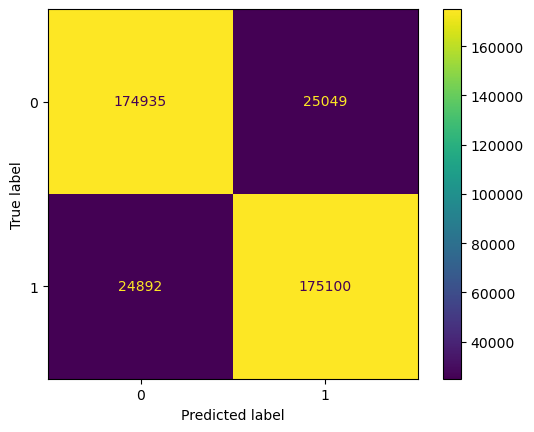

In [56]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [53]:
bayes_model = MultinomialNB()
bayes_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [54]:
# Predictions
y_train_pred = bayes_model.predict(X_train_tfidf)
y_valid_pred = bayes_model.predict(X_valid_tfidf)
y_test_pred = bayes_model.predict(X_test_tfidf)

In [55]:
# Evaluation
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Validation Accuracy: ", accuracy_score(y_valid, y_valid_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))

Training Accuracy:  0.8108077400678865
Validation Accuracy:  0.733534880877621
Test Accuracy:  0.7352266135968158


In [56]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train_tfidf, y_train)

SGDClassifier()

In [57]:
# Predictions
y_train_pred = sgd_model.predict(X_train_tfidf)
y_valid_pred = sgd_model.predict(X_valid_tfidf)
y_test_pred =sgd_model.predict(X_test_tfidf)

In [58]:
# Evaluation
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Validation Accuracy: ", accuracy_score(y_valid, y_valid_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))

Training Accuracy:  0.9327066464378139
Validation Accuracy:  0.8604709321388677
Test Accuracy:  0.861111666700002


### LSTM(Long Short term memory)

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, GRU, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [50]:
# Tokenization and text vectorization
import pickle

tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X_train) 
X_train_tokenized = tokenizer.texts_to_sequences(X_train)
X_valid_tokenized = tokenizer.texts_to_sequences(X_valid)
X_test_tokenized = tokenizer.texts_to_sequences(X_test)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

# Saving the tokenizer to a file
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [51]:
vocab_size

910915

In [52]:
# Padding the tokenized sequences 
max_length = 150
padded_train_sequences = keras.preprocessing.sequence.pad_sequences(X_train_tokenized, maxlen=max_length, padding='post')
padded_valid_sequences = keras.preprocessing.sequence.pad_sequences(X_valid_tokenized, maxlen=max_length, padding='post')
padded_test_sequences = keras.preprocessing.sequence.pad_sequences(X_test_tokenized, maxlen=max_length, padding='post')

In [62]:
embedding_dim = 100 
glove_path = 'glove.6B.100d.txt'  # Path to GloVe file

# Loading GloVe embeddings into a dictionary
embeddings_index = {}
with open(glove_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Creating` an embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [63]:
# Defining the model

# input layer
input_layer = Input(shape=(max_length,))
# Embedded layer
embedding_layer = Embedding(input_dim=vocab_size,output_dim=embedding_dim,weights=[embedding_matrix],input_length=max_length,trainable=False)(input_layer)

# LSTM layer 1
lstm_layer_1 = LSTM(64, return_sequences=True)(embedding_layer)
# Droupout layer 1
dropout_layer_1 = Dropout(0.5)(lstm_layer_1)
# LSTM layer 2
lstm_layer_2 = LSTM(32)(dropout_layer_1)

# Dense layer
dense_layer = Dense(32, activation='relu')(lstm_layer_2)
# Droupout layer 2
dropout_layer_2 = Dropout(0.5)(dense_layer)
# Output layer
output_layer = Dense(1, activation='sigmoid')(dropout_layer_2)

# Creating the model
model = Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 150, 100)       │    91,091,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 150, 64)        │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 150, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,147,245 (347.70 MB)

 Trainable params: 55,745 (217.75 KB)

 Non-trainable params: 91,091,500 (347.49 MB)

In [64]:
# compiling and training the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Training with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = model.fit(padded_train_sequences, y_train, validation_data=(padded_valid_sequences, y_valid),
                    batch_size=512, epochs=5, callbacks=[early_stopping])

Epoch 1/5
6327/6327 ━━━━━━━━━━━━━━━━━━━━ 2721s 430ms/step - accuracy: 0.5395 - loss: 0.6789 - val_accuracy: 0.8921 - val_loss: 0.2608
Epoch 2/5
6327/6327 ━━━━━━━━━━━━━━━━━━━━ 2905s 459ms/step - accuracy: 0.9084 - loss: 0.2398 - val_accuracy: 0.9276 - val_loss: 0.1828
Epoch 3/5
6327/6327 ━━━━━━━━━━━━━━━━━━━━ 2381s 376ms/step - accuracy: 0.9304 - loss: 0.1898 - val_accuracy: 0.9370 - val_loss: 0.1633
Epoch 4/5
6327/6327 ━━━━━━━━━━━━━━━━━━━━ 3253s 514ms/step - accuracy: 0.9373 - loss: 0.1722 - val_accuracy: 0.9414 - val_loss: 0.1560
Epoch 5/5
6327/6327 ━━━━━━━━━━━━━━━━━━━━ 2586s 409ms/step - accuracy: 0.9415 - loss: 0.1621 - val_accuracy: 0.9430 - val_loss: 0.1512


In [65]:
# Evaluating the model on test data
test_loss, test_accuracy = model.evaluate(padded_test_sequences, y_test)
test_accuracy

12500/12500 ━━━━━━━━━━━━━━━━━━━━ 384s 31ms/step - accuracy: 0.9412 - loss: 0.1574


0.9423590302467346

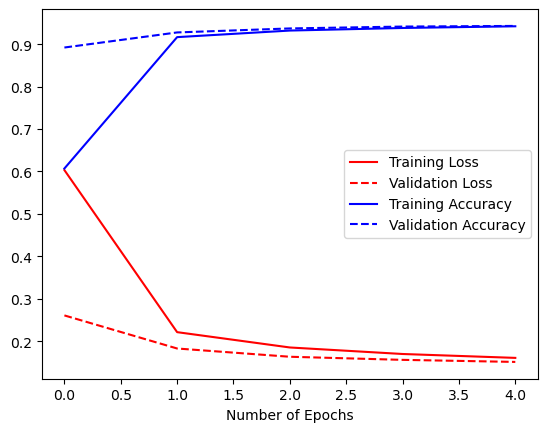

In [67]:
# Plotting loss and accuracy of validation and training data
h = history.history
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend() 

## Model Evaluation 

Among all LSTM model got the highest accuracy. considering this as the final model

In [56]:
y_preds = tf.round(model.predict(padded_test_sequences))

12500/12500 ━━━━━━━━━━━━━━━━━━━━ 228s 18ms/step


### Classification report

In [59]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94    199984
           1       0.95      0.93      0.94    199992

    accuracy                           0.94    399976
   macro avg       0.94      0.94      0.94    399976
weighted avg       0.94      0.94      0.94    399976



### Confusion Matrix

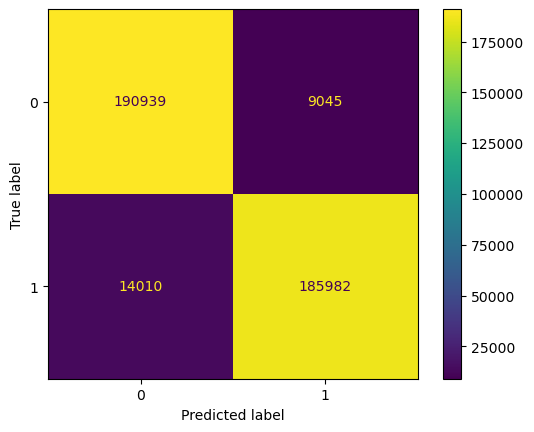

In [60]:
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Model Exporting

In [68]:
model.save('alexaReviews_model.keras')

In [61]:
model.save_weights('model.weights.h5')